In [1]:
import numpy as np 
import pandas as pd
import pickle

data_dir = "./data"
matrix_file = data_dir + '/df.matrix.pkl'
matrix = pd.read_pickle(matrix_file)
df_targets = pd.read_pickle('./data/df.targets.pkl')

In [29]:
data_to_model_month = pd.concat([matrix, df_targets['tar.paid.within.month']], axis=1)
positive = data_to_model_month[data_to_model_month['tar.paid.within.month'] == True]
negative = data_to_model_month[data_to_model_month['tar.paid.within.month'] == False].sample(n=positive.shape[0])

data_all = pd.concat([positive, negative], axis=0).sample(frac=1).reset_index(drop=True)
data_x = data_all.drop(['tar.paid.within.month'], axis=1).to_numpy()
data_y = data_all['tar.paid.within.month']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C = 1, max_iter=1000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import precision_recall_curve
probs = logisticRegr.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

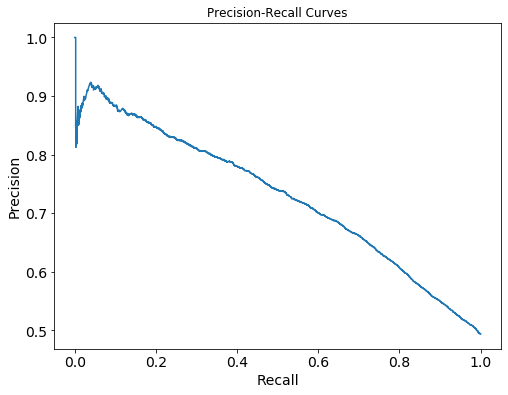

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title("Precision-Recall Curves")
plt.plot(recall, precision)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.show()

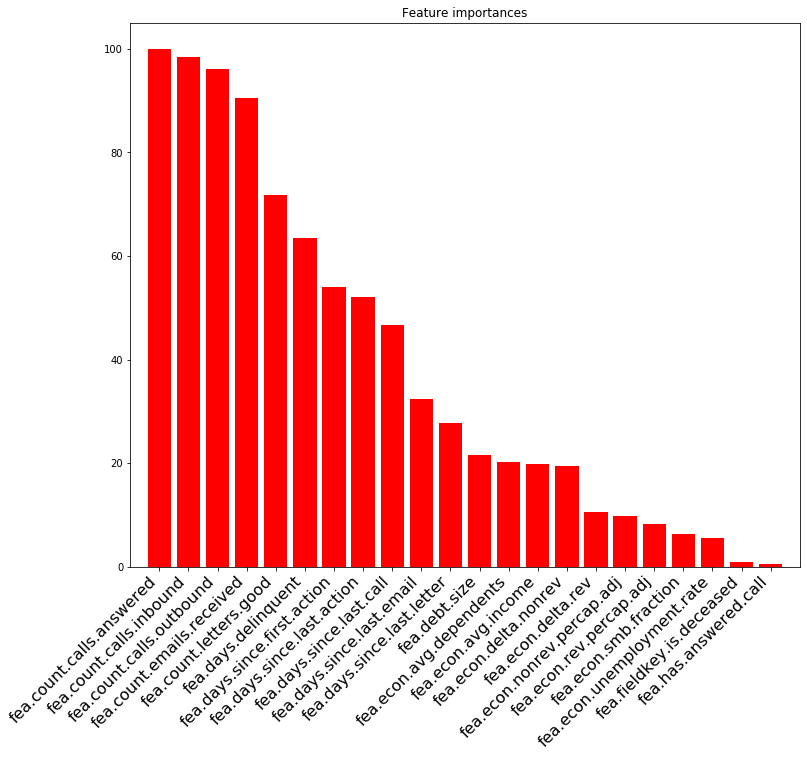

In [64]:
# Feature Importance: 
# We can't infer the feature importance of the linear classifiers directly.
# On the other hand, what we can do is see the magnitude of its coefficient. 
# This will tell us roughly how important each feature is.
# https://stackoverflow.com/questions/24255723/sklearn-logistic-regression-important-features
importances = abs(logisticRegr.coef_[0])
importances = 100 * (importances / importances.max())
sorted_idx = np.argsort(importances)[::-1]
feature_names = np.array(positive.columns)
pos = np.arange(sorted_idx.shape[0])


plt.figure(figsize=(12, 10))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[sorted_idx], color="r", align="center")
plt.xticks(range(x_train.shape[1]), feature_names, rotation=45, ha='right', fontsize=16)
plt.xlim([-1, x_train.shape[1]])
plt.show()